In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Завдання 1
Згенерувати N тривимiрних незалежних випадкових векторiв, в яких координати незалежнi,
першi двi координати мають показниковий розподiл з параметром 1, третя координата має
стандартний нормальний розподiл.

In [2]:
N = 20
exp_coords = np.random.exponential(scale=1.0, size=(N, 2))
norm_coords = np.random.normal(loc=0, scale=1.0, size=(N, 1))
arr = np.hstack([exp_coords, norm_coords])

k = 5
print(f"N = {N}, виведемо для прикладу {k}-ту координату:", "\n", arr[k])

N = 20, виведемо для прикладу 5-ту координату: 
 [ 1.85412995  0.38806203 -0.32136092]


### Завдання 2
Реалiзувати алгоритм Козинця пошуку роздiляючого вектора для опуклої оболонки згенеро-
ваних векторiв. Алгоритм має працювати для довiльного N.

In [3]:
def kozynets_separator(vectors, max_iterations=1000, tolerance=1e-6):
    alpha = np.mean(vectors, axis=0)
    for _ in range(max_iterations):
        dot_products = vectors @ alpha
        min_dot = np.min(dot_products)
        
        if min_dot > 0:
            return alpha
        
        j = np.argmin(dot_products)
        x_j = vectors[j]
        
        numerator = alpha @ alpha
        denominator = alpha @ x_j - alpha @ alpha
        if denominator == 0:
            return None
        k = numerator / denominator
        
        k = np.clip(k, 0, 1)
        new_alpha = (1 - k) * alpha + k * x_j
        
        if np.linalg.norm(new_alpha - alpha) < tolerance:
            return new_alpha
        
        alpha = new_alpha
    return None


In [4]:
np.random.seed(42)
X = np.random.randn(100, 3)
separator = kozynets_separator(X)

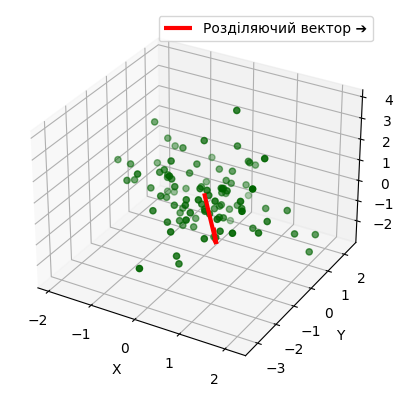

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], color='darkgreen')
norm = np.linalg.norm(separator)
separator_normalized = separator / norm
ax.quiver(0, 0, 0,
          separator_normalized[0], separator_normalized[1], separator_normalized[2],
          color='red',
          linewidth=3,
          arrow_length_ratio=0.2,
          length=4,
          normalize=True,
          label='Розділяючий вектор ➔')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()